## Локальный и глобальный поиск

Решите задачу коммивояжера на основе файла данных `hw9_data/tsp.csv`: найти минимальный НЕЦИКЛИЧЕСКИЙ путь (начинается и заканчивается в разных точках), соединяющий N точек. Файл содержит координаты каждого из городов на плоскости (1й столбец - номер города, 2й и 3й - координаты). Используйте L1 расстояние для расчетов и визуализации.



In [159]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import scipy
import pandas as pd
from scipy.special import softmax

In [240]:
def read_data(path="./hw9_data/tsp.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=0)
    X = dataframe[:, 1:3]
    y = dataframe[:, 0]
    return X, y

def l1(X, permutation):
    X = X[permutation]
    s = 0
    for i in range(len(X) - 1):
        s += np.abs(X[i][0] - X[i + 1][0]) + np.abs(X[i][1] - X[i + 1][1]) 
    return s

def pretty_plot(X, res):
    X_plot = copy.deepcopy(X)
    X_plot = X_plot[res[0]]
    
    x_dot, y_dot = X_plot.T[0], X_plot.T[1]
    x_new, y_new = x_dot[0], y_dot[0]
    
    verts = [(x_dot[0], y_dot[0])]
    for x, y in zip(x_dot[1:], y_dot[1:]):
        verts.append((x_new, y))
        verts.append((x, y))
        x_new, y_new = x, y

    pathpatch = matplotlib.patches.PathPatch(matplotlib.path.Path(np.array(verts, float), [matplotlib.path.Path.MOVETO] + [matplotlib.path.Path.LINETO]*2*(len(X_plot)-1)),  facecolor='None')
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(X_plot.T[0], X_plot.T[1])
    ax.autoscale_view()
    ax.add_patch(pathpatch)
    plt.show()

In [100]:
X, y = read_data()

### Задание 1 (1 балл) 

Реализуйте Монте-Карло поиск.

In [124]:
def Monte_Carlo(X, iterations = 100): 
    l1_m = np.inf
    length_X = len(X)
    for i in range(iterations):
        permutation = np.random.permutation(length_X)
        l1_temp = l1(X, permutation) 
        if l1_temp < l1_m:
            l1_m = l1_temp
            permutation_m = permutation.copy()
    return permutation_m, l1_m

In [147]:
result_MC = Monte_Carlo(copy.deepcopy(X), 10000)

Наименьший нециклический путь имеет длинну (L1 расстояние): 28415.0


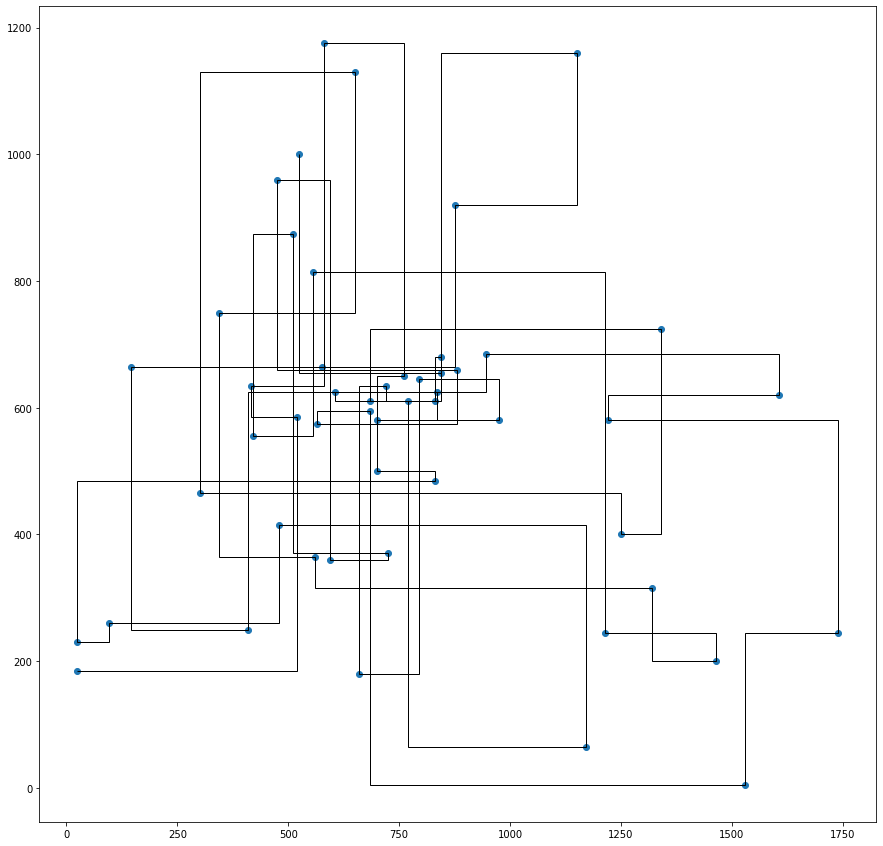

In [241]:
print('Наименьший нециклический путь имеет длинну (L1 расстояние):',result_MC[1])
pretty_plot(X, result_MC)

### Задание 2 (1 балл) 

Реализуйте поиск случайным блужданием.

In [152]:
def Randonner(X, iterations = 100):
    l1_m = np.inf
    main_permutation = np.random.permutation(len(X))
    for i in range(iterations):
        samples = np.random.choice(len(main_permutation), 10, replace=False)
        main_permutation[samples] =  main_permutation[np.roll(samples, 1)]
        l1_temp = l1(X, main_permutation) 
        
        if l1_temp < l1_m:
            l1_m = l1_temp
            permutation_m = main_permutation.copy()
            
    return permutation_m, l1_m

In [153]:
result_R = Randonner(copy.deepcopy(X), 10000)

Наименьший нециклический путь имеет длинну (L1 расстояние): 29020.0


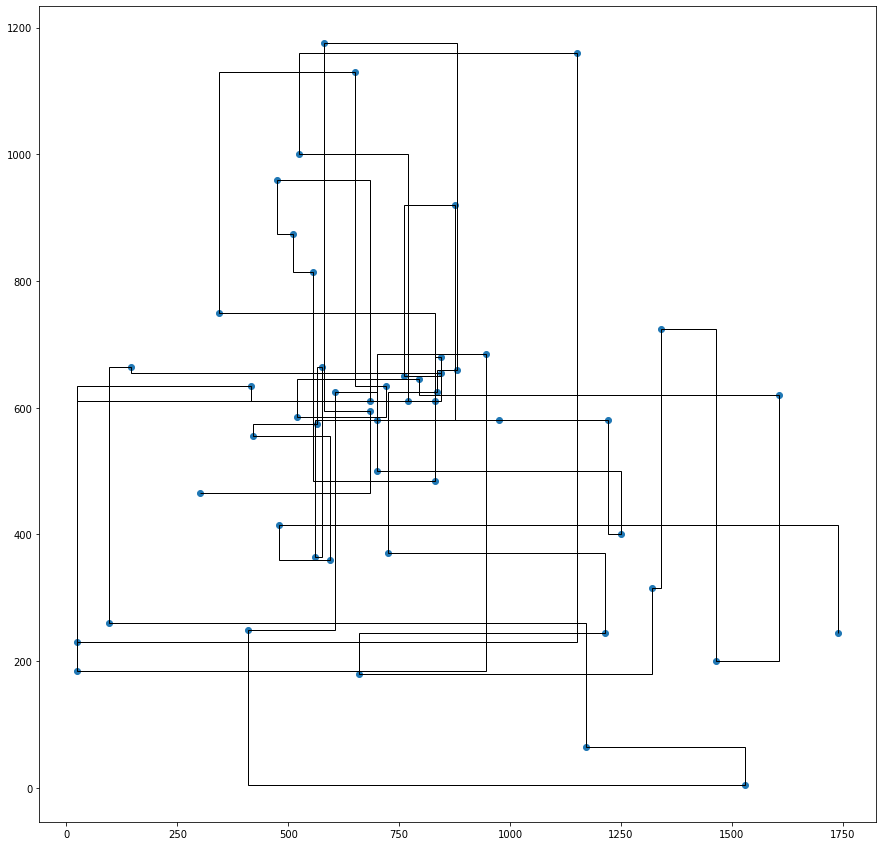

In [242]:
print('Наименьший нециклический путь имеет длинну (L1 расстояние):',result_R[1])
pretty_plot(X, result_R)

### Задание 3 (2 балла) 

Реализуйте Hill Climb.

In [198]:
def Hill_Climb(X, iterations = 100, repeat = 10):
    main_permutation = np.random.permutation(len(X))
    for j in range(iterations):
        per = [0 for _ in range(repeat)]
        losses = np.zeros(repeat)
        for i in range(repeat):
            samples = np.random.choice(len(main_permutation), 10, replace=False)
            per[i] = main_permutation.copy()
            per[i][samples] = per[i][np.roll(samples, 1)]
            losses[i] = l1(X, per[i]) 
        main_permutation = per[np.random.choice(repeat, p = scipy.special.softmax(-losses))]
    
    return main_permutation, l1(X, main_permutation) 

In [201]:
result_HC = Hill_Climb(copy.deepcopy(X), 1000)

Наименьший нециклический путь имеет длинну (L1 расстояние): 27355.0


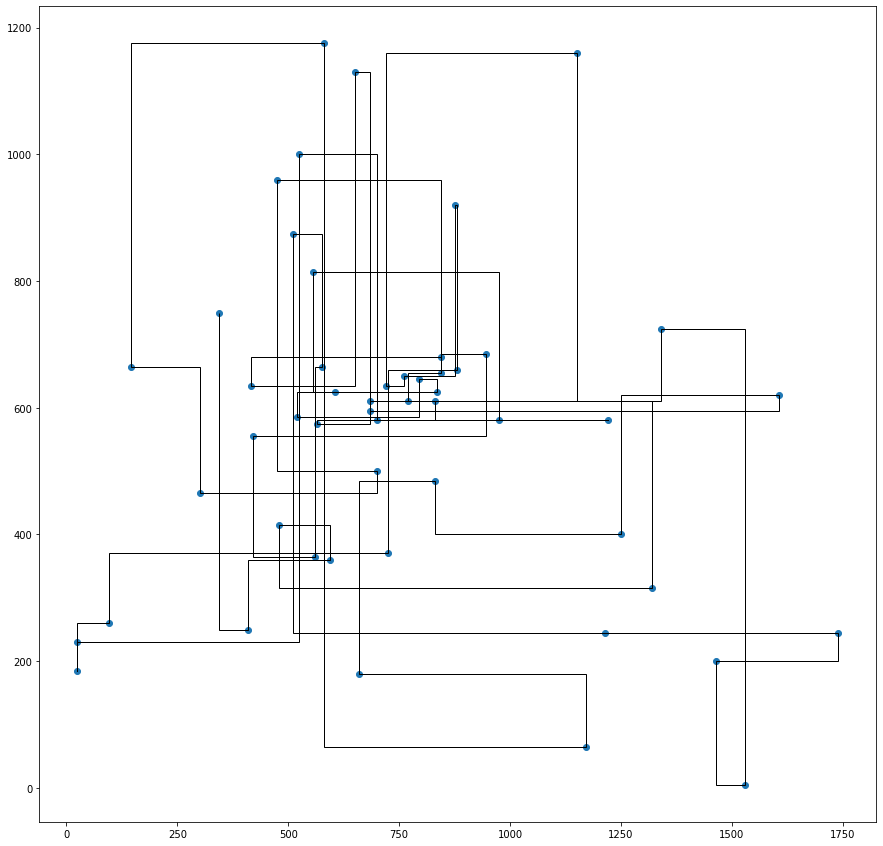

In [243]:
print('Наименьший нециклический путь имеет длинну (L1 расстояние):',result_HC[1])
pretty_plot(X, result_HC)

### Задание 4 (3 балла) 


Реализуйте отжиг (simulated annealing). Температурный режим отжига выберите самостоятельно.

In [231]:
def Sim_Annealing(X, iterations = 100):
    main_permutation = np.random.permutation(len(X))
    l1_m = l1(X, main_permutation)
    for temperature in np.linspace(10000, 1e-10, iterations):
        changed_samples = np.random.choice(len(main_permutation), 2, replace=False)
        new_permutation = main_permutation.copy()
        new_permutation[changed_samples] = new_permutation[np.roll(changed_samples, 1)]
        l1_temp = l1(X, new_permutation)
        if l1_m > l1_temp or np.random.rand() < np.exp(-(l1_temp - l1_m)/temperature):
            l1_m = l1_temp
            main_permutation = new_permutation

    
    return main_permutation, old_loss

In [232]:
result_SA = Sim_Annealing(copy.deepcopy(X), 1000000)

Наименьший нециклический путь имеет длинну (L1 расстояние): 10500.0


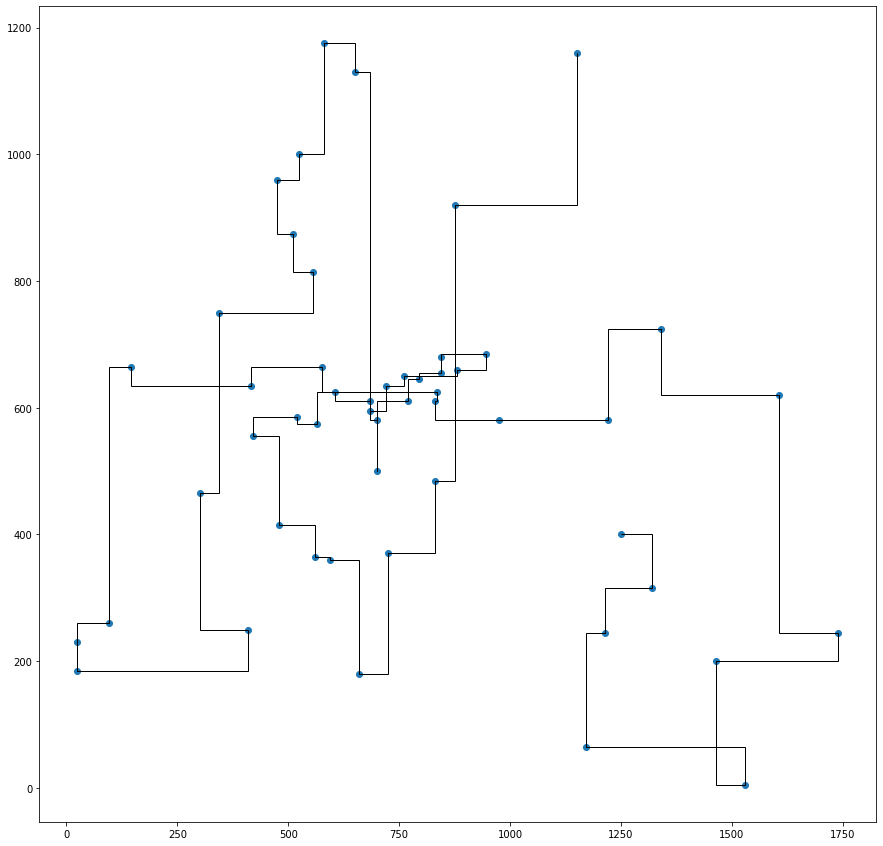

In [244]:
print('Наименьший нециклический путь имеет длинну (L1 расстояние):',result_SA[1])
pretty_plot(X, result_SA)

### Задание 5 (3 балла) 

Реализуйте генетический алгоритм.

In [311]:
def Genetic(X, iterations = 100):
    size_population = 20
    length_X = len(X)
    population = [np.random.permutation(length_X) for i in range(size_population)]
    for _ in range(iterations):
        population.sort(key=lambda x: l1(X, x))
        seq_1 = copy.deepcopy(population[0])
        seq_2 = copy.deepcopy(population[1]) 
        seq_1 = np.roll(seq_1, -list(seq_1).index(0))
        seq_2 = np.roll(seq_2, -list(seq_2).index(0))
        a = seq_1==seq_2
        number_set = set(list(range(length_X)))
        for i in range(len(a) - 1):
            if a[i] == True and a[i+1]!=True:
                number_set -= set([int(seq_1[i])])
                gun = i
                break
            number_set -= set(a[i])
        c = list(number_set)
        d = list(number_set)
        random.shuffle(c)
        random.shuffle(d)
        seq_1 = np.append(seq_1[:gun+1], c)
        seq_2 = np.append(seq_2[:gun+1], d)
        population[-1] = seq_1
        population[-2] = seq_2
    return population[0], l1(X, population[0]) 

In [319]:
result_Gen = Genetic(copy.deepcopy(X), 10000)

Наименьший нециклический путь имеет длинну (L1 расстояние): 28735.0


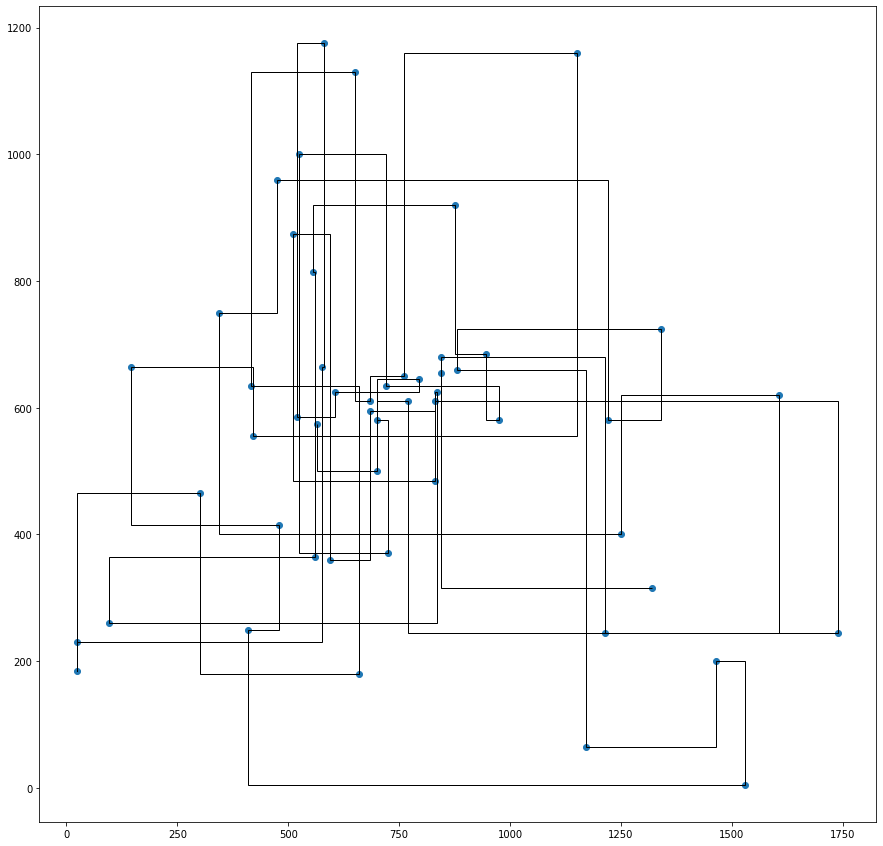

In [320]:
print('Наименьший нециклический путь имеет длинну (L1 расстояние):',result_Gen[1])
pretty_plot(X, result_Gen)